In [50]:
from PIL import Image
from utils import get_letter_images_from_grid
import matplotlib.pyplot as plt
from PIL.ImageOps import invert
import numpy as np
from keras import models

In [51]:
alphabet_mapping = {i: chr(64 + i +1) for i in range(0,26)}

In [52]:
model = models.load_model('../model/emnist-lib-model.keras')

In [53]:
n = 4
img_dimension = 28
img = Image.open('grids/grid-n4-1735640573.9416156.png')
letters_images = get_letter_images_from_grid(img=img, n=n)

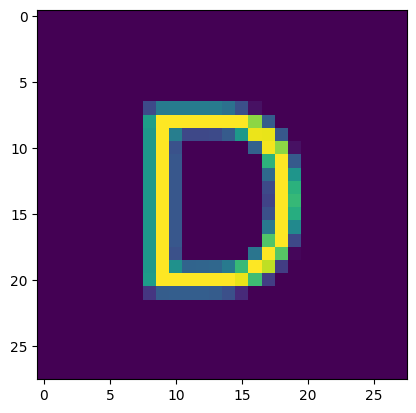

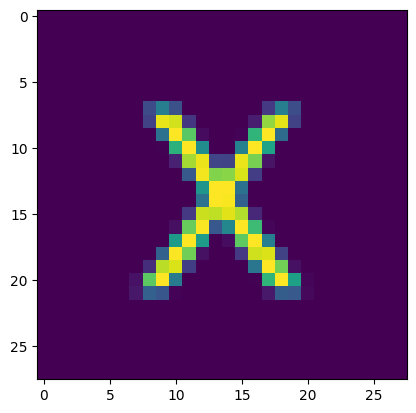

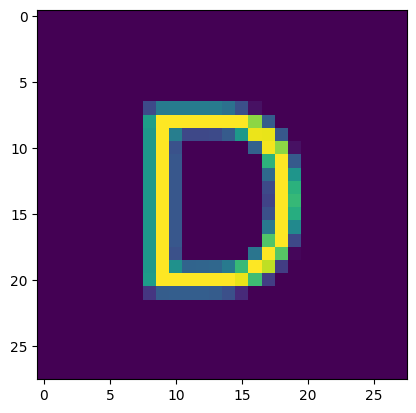

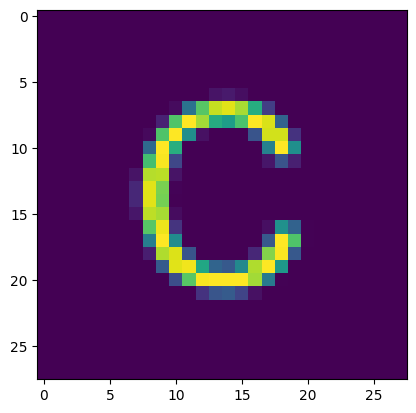

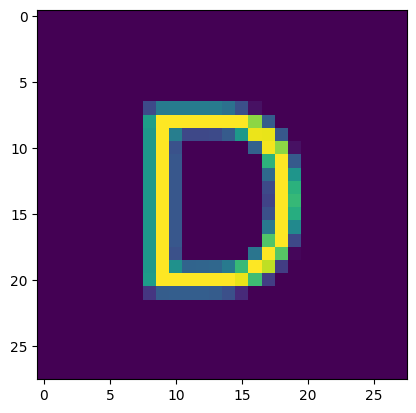

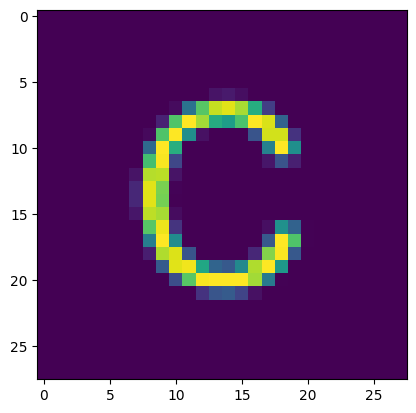

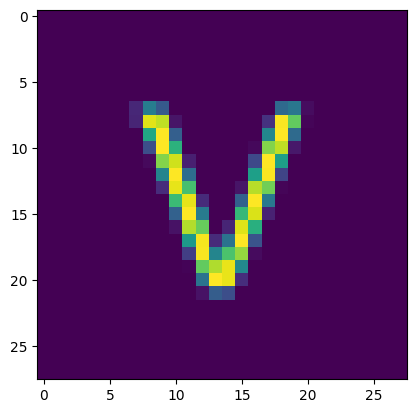

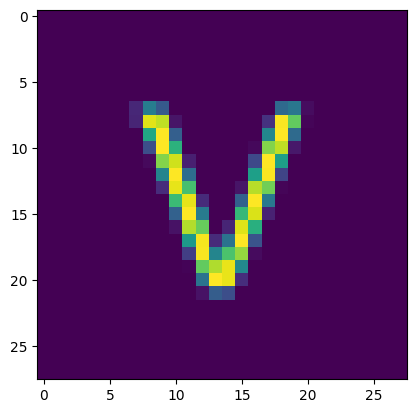

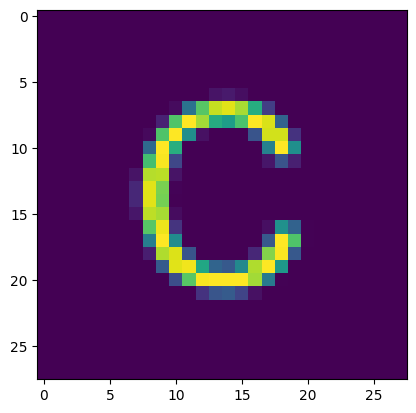

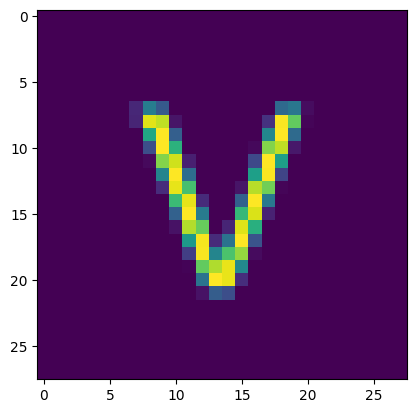

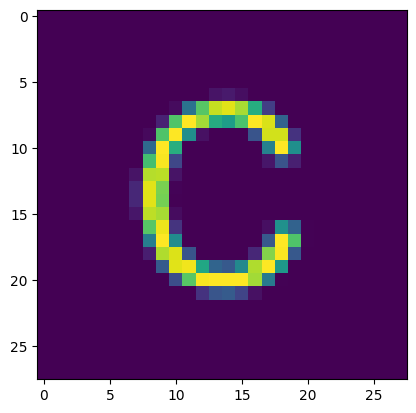

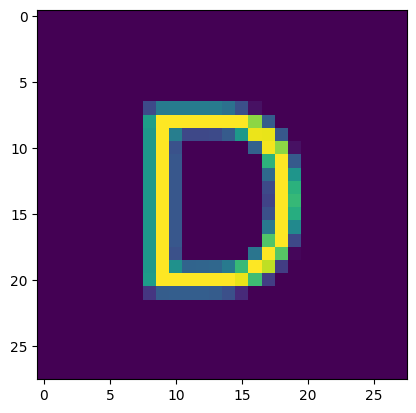

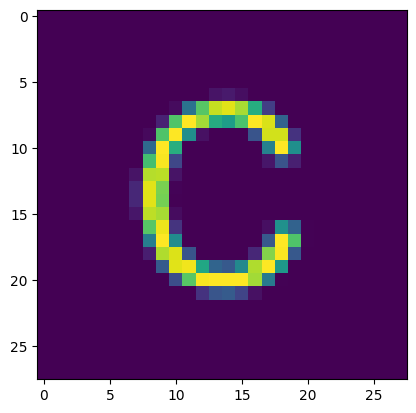

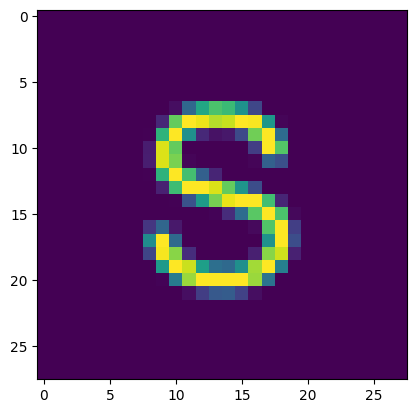

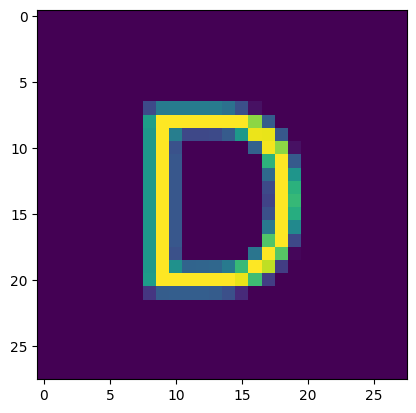

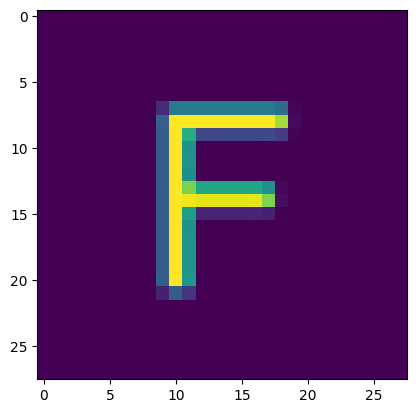

In [54]:
for i,letter in enumerate(letters_images):
  letter.thumbnail((img_dimension,img_dimension))
  letter = invert(letter)
  letter = np.asarray(letter, dtype="int32")/255
  plt.imshow(letter)
  plt.show()
  letter = letter.reshape((1,img_dimension,img_dimension,1))
  letters_images[i] = letter

In [55]:
letters_images = np.asarray(letters_images)

In [56]:
letters_images = letters_images.reshape((n,n,1,img_dimension,img_dimension,1))

In [59]:
letters = np.empty((n,n), dtype='str')
for i in range(n):
  for j in range(n):
    letter_prediction = model.predict(letters_images[i][j])
    max = np.argmax(letter_prediction)
    letter = alphabet_mapping.get(max)
    print(letter)
    letters[i][j] = letter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
F


In [60]:
letters

array([['D', 'X', 'D', 'C'],
       ['D', 'C', 'V', 'V'],
       ['C', 'V', 'C', 'D'],
       ['C', 'S', 'D', 'F']], dtype='<U1')